<a href="https://colab.research.google.com/github/AlviJohn/AmazonRecoEngine/blob/main/Amazon_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%time
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from os import listdir
import os
import gzip
import json
from google.colab import drive
import gc
from PIL import Image
import requests
from io import BytesIO

from IPython.display import display

## Amazon Dataset --https://nijianmo.github.io/amazon/index.html
###Mounting Google Drive
drive.mount('/content/drive')
path ="/content/drive/MyDrive/LJMU Research Topic/colab_experiments/data/raw"
os.chdir(path)

Mounted at /content/drive
CPU times: user 2.32 s, sys: 651 ms, total: 2.97 s
Wall time: 27.3 s


In [ ]:
#!wget --no-check-certificate https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/AMAZON_FASHION_5.json.gz
#!wget --no-check-certificate https://jmcauley.ucsd.edu/data/amazon_v2/metaFiles2/meta_AMAZON_FASHION.json.gz


!wget --no-check-certificate https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Prime_Pantry_5.json.gz
!wget --no-check-certificate https://jmcauley.ucsd.edu/data/amazon_v2/metaFiles2/meta_Prime_Pantry.json.gz

--2023-06-01 17:32:22--  https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Prime_Pantry_5.json.gz
Resolving jmcauley.ucsd.edu (jmcauley.ucsd.edu)... 137.110.160.73
Connecting to jmcauley.ucsd.edu (jmcauley.ucsd.edu)|137.110.160.73|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 11837057 (11M) [application/x-gzip]
Saving to: ‘Prime_Pantry_5.json.gz’

Prime_Pantry_5.json 100%[===================>]  11.29M  8.43MB/s    in 1.3s    

2023-06-01 17:32:24 (8.43 MB/s) - ‘Prime_Pantry_5.json.gz’ saved [11837057/11837057]

--2023-06-01 17:32:24--  https://jmcauley.ucsd.edu/data/amazon_v2/metaFiles2/meta_Prime_Pantry.json.gz
Resolving jmcauley.ucsd.edu (jmcauley.ucsd.edu)... 137.110.160.73
Connecting to jmcauley.ucsd.edu (jmcauley.ucsd.edu)|137.110.160.73|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 5281662 (5.0M) [application/x-gzi

**Reading Initial Datasets**

In [ ]:
%%time
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')


# ###Reading User Ratings


#ratings_data = getDF('AMAZON_FASHION_5.json.gz')

ratings_data = getDF('Prime_Pantry_5.json.gz')


columns=['reviewerID', 'asin',\
         'reviewerName', 'helpful', 'reviewText',\
         'overall', 'summary', 'unixReviewTime', 'reviewTime']

#ratings_data = ratings_data[columns]
print(ratings_data.shape)
print(ratings_data.head())
ratings_data.to_csv('user_item_rating_pantry.csv')


(137788, 12)
   overall  verified   reviewTime      reviewerID        asin  \
0      4.0      True  09 24, 2015  A31Y9ELLA1JUB0  B0000DIWNI   
1      5.0      True  06 23, 2015  A2FYW9VZ0AMXKY  B0000DIWNI   
2      5.0      True  06 13, 2015  A1NE43T0OM6NNX  B0000DIWNI   
3      4.0      True   06 3, 2015   AHTCPGK2CNPKU  B0000DIWNI   
4      5.0      True  04 20, 2015  A25SIBTMVXLB59  B0000DIWNI   

                                    reviewerName  \
0  Her Royal Peepness Princess HoneyBunny Blayze   
1                                           Mary   
2                                        Tulay C   
3                                       OmaShops   
4                                    Nitemanslim   

                                          reviewText  \
0  I purchased this Saran premium plastic wrap af...   
1  I am an avid cook and baker.  Saran Premium Pl...   
2  Good wrap, keeping it in the fridge makes it e...   
3  I prefer Saran wrap over other brands. It does...   
4  

In [ ]:
%%time
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

#meta_data = getDF('meta_AMAZON_FASHION.json.gz')

meta_data = getDF('meta_Prime_Pantry.json.gz')

columns=["asin","title","description","feature",\
                               "imageURL","imageURLHighRes",\
                               "brand"]

# meta_data = meta_data[columns]

print(meta_data.shape)
display(meta_data.head())
meta_data.to_csv('product_metadata_pantry.csv')


(10813, 19)


,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,[],,[Sink your sweet tooth into MILK DUDS Candya d...,,"HERSHEY'S Milk Duds Candy, 5 Ounce(Halloween C...","[B019KE37WO, B007NQSWEU]",,Milk Duds,[],[],[],"{'ASIN: ': 'B00005BPJO', 'Item model number:':...","<img src=""https://m.media-amazon.com/images/G/...",,,$5.00,B00005BPJO,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,[],,[Sink your sweet tooth into MILK DUDS Candya d...,,"HERSHEY'S Milk Duds Candy, 5 Ounce(Halloween C...","[B019KE37WO, B007NQSWEU]",,Milk Duds,[],[],[],"{'ASIN: ': 'B00005BPJO', 'Item model number:':...","<img src=""https://m.media-amazon.com/images/G/...",,,$5.00,B00005BPJO,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
2,[],,[A perfect Lentil soup starts with Goya Lentil...,,"Goya Dry Lentils, 16 oz","[B003SI144W, B000VDRKEK]",,Goya,[],[],"[B074MFVZG7, B079PTH69L, B000VDRKEK, B074M9T81...",{'ASIN: ': 'B0000DIF38'},"<img src=""https://images-na.ssl-images-amazon....",,,,B0000DIF38,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,[],,[Saran Premium Wrap is an extra tough yet easy...,,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",,Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",{'Domestic Shipping: ': 'This item can only be...,"<img src=""https://images-na.ssl-images-amazon....",,,,B0000DIWNI,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,[],,[200 sq ft (285 ft x 11-3/4 in x 18.6 m2). Eas...,,"Saran Cling Plus Plastic Wrap, 200 Sq Ft",[],,Saran,[],[],[B0014CZ0TE],{'Domestic Shipping: ': 'This item can only be...,"<img src=""https://images-na.ssl-images-amazon....",,,,B0000DIWNZ,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


CPU times: user 1.53 s, sys: 27.3 ms, total: 1.56 s
Wall time: 1.66 s


In [ ]:
display()

In [ ]:
%%time
ratings_data = pd.read_csv('user_item_rating_pantry.csv')
meta_data = pd.read_csv('product_metadata_pantry.csv')

unique_items = ratings_data['asin'].unique()
meta_data_subset = meta_data[meta_data['asin'].isin(unique_items)]
meta_data_subset =meta_data_subset[~meta_data_subset['asin'].isna()]

display(meta_data_subset.shape)

meta_data_subset.to_csv('meta_data_subset_pantry.csv')




(4968, 20)

CPU times: user 1.03 s, sys: 77.4 ms, total: 1.11 s
Wall time: 3.23 s


In [ ]:
%%time

from ast import literal_eval

####Extracting Image Names
for index, row in meta_data_subset.iterrows():
  try:
    url = literal_eval(row['imageURLHighRes'])[0]
    if url:
      response = requests.get(url)
      img = Image.open(BytesIO(response.content))
      img.save(path +'/images_pantry/'+row['asin']+'.jpeg')
  except Exception as e:
    print(url)
    print(f"Error downloading image for asin: {row['asin']}")
    print(e)


https://images-na.ssl-images-amazon.com/images/I/51RiCmF58BL.jpg
Error downloading image for asin: B0014CQ7C8
list index out of range
https://images-na.ssl-images-amazon.com/images/I/51AIALsc8AL.jpg
Error downloading image for asin: B0017IH4QC
list index out of range
https://images-na.ssl-images-amazon.com/images/I/51H2OVRAzCL.jpg
Error downloading image for asin: B00I9L4NN2
list index out of range
https://images-na.ssl-images-amazon.com/images/I/51H2OVRAzCL.jpg
Error downloading image for asin: B00I9L4S8W
list index out of range
https://images-na.ssl-images-amazon.com/images/I/41ZmIytRh8L.jpg
Error downloading image for asin: B00IAE9PU4
list index out of range
https://images-na.ssl-images-amazon.com/images/I/51orhjLAHdL.jpg
Error downloading image for asin: B00J2KIU10
list index out of range
https://images-na.ssl-images-amazon.com/images/I/41Bsk-7RuaL.jpg
Error downloading image for asin: B00J2L6EU8
list index out of range
https://images-na.ssl-images-amazon.com/images/I/51CUD3XFXfL.j

**Basic EDA**

In [ ]:
####EDA for User - item Rating

#number of rows in dataframe  which are the total number of ratings
total_num_of_ratings = len(ratings_data)
print("total number of user-items ratings is: %d" % total_num_of_ratings)

#number of unique reviewers
num_of_users = len(ratings_data['reviewerID'].unique())
print("number of unique reviewers is: %d" % num_of_users)

#number of unique items
num_of_items = len(ratings_data['asin'].unique())
print("number of unique items is: %d" % num_of_items)

#average rating and standar deviation
ratings_mean = ratings_data['overall'].mean()
ratings_std = ratings_data['overall'].std()
print("average rating is %.3f and standard deviation %.3f" % (ratings_mean,ratings_std))

# The sparsity of the user-item matrix
sparsity = float(total_num_of_ratings) / (num_of_users * num_of_items)
print ("sparisity of the user-item matrix is %.8f" % sparsity)

users_df = ratings_data.groupby('reviewerID').size()
print ("The average number of items rated by a user is %f" % np.mean(users_df))
print ("The average number of items rated by a user is %f" % np.std(users_df))
print ("The minimum number of items rated by a user is %d" % min(users_df))
print ("The maximum number of items rated by a user is %d" % max(users_df))

items_df = ratings_data.groupby('asin').size()
print ("The average number of users that rated an item is %f" % np.mean(items_df))
print ("The standard deviation of number of users that rated an item is %f" % np.std(items_df))
print ("The minimum number of users that rated an item is %d" % min(items_df))
print ("The minimum number of users that rated an item is %d" % max(items_df))

total number of user-items ratings is: 137788
number of unique reviewers is: 14180
number of unique items is: 4970
average rating is 4.546 and standard deviation 0.907
sparisity of the user-item matrix is 0.00195514
The average number of items rated by a user is 9.717066
The average number of items rated by a user is 8.636488
The minimum number of items rated by a user is 5
The maximum number of items rated by a user is 194
The average number of users that rated an item is 27.723944
The standard deviation of number of users that rated an item is 43.691168
The minimum number of users that rated an item is 2
The minimum number of users that rated an item is 665


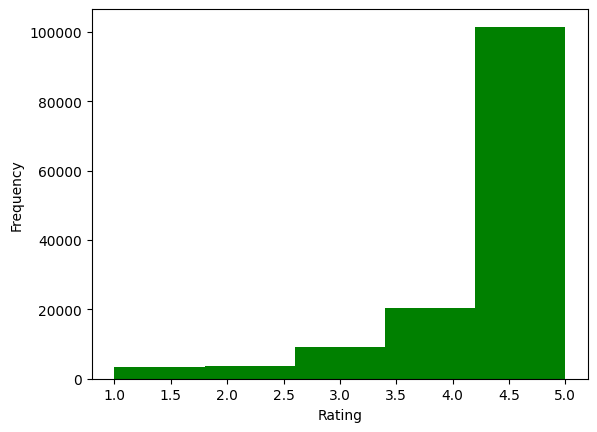

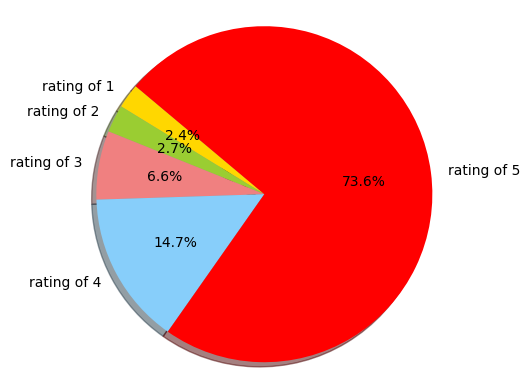

In [ ]:
###Distribution of Ratings

# frequency of each rating in a histogram
plt.figure(1)
plt.hist(ratings_data['overall'],5, facecolor='g')
plt.xlabel('Rating')
plt.ylabel('Frequency')


# percentage of each rating in a pie chart
plt.figure(2)
labels = 'rating of 1', 'rating of 2' ,'rating of 3', 'rating of 4','rating of 5'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']
plt.pie(ratings_data.groupby('overall').size(),labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.show()

EDA Meta Data

In [ ]:
### Merging both Datasets 

In [ ]:
product_reviews =pd.merge(ratings_data,meta_data,on='asin',how='left')
product_reviews.head()

,Unnamed: 0_x,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,feature,rank,also_view,details,main_cat,similar_item,date,price,imageURL,imageURLHighRes
0,0,4.0,True,"09 24, 2015",A31Y9ELLA1JUB0,B0000DIWNI,Her Royal Peepness Princess HoneyBunny Blayze,I purchased this Saran premium plastic wrap af...,Pretty Good For plastic Wrap,1443052800,...,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",{'Domestic Shipping: ': 'This item can only be...,"<img src=""https://images-na.ssl-images-amazon....",NaN,NaN,NaN,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...
1,1,5.0,True,"06 23, 2015",A2FYW9VZ0AMXKY,B0000DIWNI,Mary,I am an avid cook and baker. Saran Premium Pl...,"The Best Plastic Wrap for your Cooking, Baking...",1435017600,...,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",{'Domestic Shipping: ': 'This item can only be...,"<img src=""https://images-na.ssl-images-amazon....",NaN,NaN,NaN,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...
2,2,5.0,True,"06 13, 2015",A1NE43T0OM6NNX,B0000DIWNI,Tulay C,"Good wrap, keeping it in the fridge makes it e...",Good and strong.,1434153600,...,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",{'Domestic Shipping: ': 'This item can only be...,"<img src=""https://images-na.ssl-images-amazon....",NaN,NaN,NaN,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...
3,3,4.0,True,"06 3, 2015",AHTCPGK2CNPKU,B0000DIWNI,OmaShops,I prefer Saran wrap over other brands. It does...,Doesn't cling as well to dishes as other brand...,1433289600,...,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",{'Domestic Shipping: ': 'This item can only be...,"<img src=""https://images-na.ssl-images-amazon....",NaN,NaN,NaN,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...
4,4,5.0,True,"04 20, 2015",A25SIBTMVXLB59,B0000DIWNI,Nitemanslim,Thanks,Five Stars,1429488000,...,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",{'Domestic Shipping: ': 'This item can only be...,"<img src=""https://images-na.ssl-images-amazon....",NaN,NaN,NaN,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...


In [ ]:
display(ratings_data.isnull().sum()*100/ratings_data.shape[0])
display(ratings_data.shape)

Unnamed: 0         0.000000
overall            0.000000
verified           0.000000
reviewTime         0.000000
reviewerID         0.000000
asin               0.000000
reviewerName       0.021047
reviewText         0.128458
summary            0.045722
unixReviewTime     0.000000
vote              93.151073
image             99.517375
style             99.163933
dtype: float64

(137788, 13)

In [ ]:
display(meta_data_subset.isnull().sum()*100/meta_data_subset.shape[0])
display(meta_data_subset.shape)

Unnamed: 0           0.000000
title                0.000000
brand               61.290323
feature              0.000000
rank                 0.000000
date                 0.000000
asin                 0.000000
imageURL             0.000000
imageURLHighRes      0.000000
description         29.032258
price                9.677419
also_view            6.451613
also_buy             0.000000
fit                 19.354839
details            100.000000
similar_item       100.000000
tech1              100.000000
dtype: float64

(31, 17)

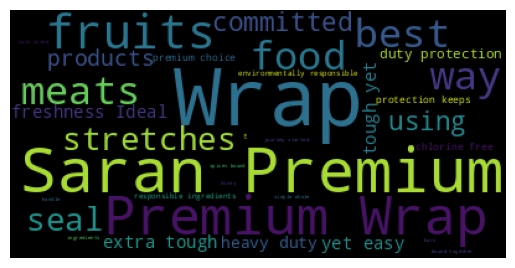

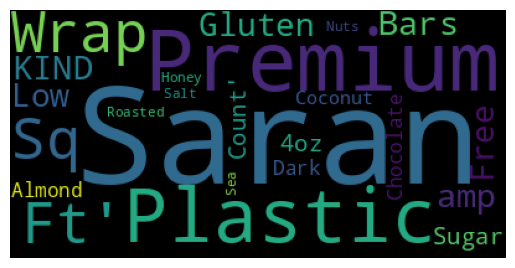

In [ ]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

### Description
text = product_reviews['description'].values 
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# ### Description
# text = product_reviews['feature'].values 
# wordcloud = WordCloud().generate(str(text))
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.show()

### Description
text = product_reviews['title'].values 
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()